# 输入数据

In [112]:
import pandas as pd

In [113]:
d = pd.read_csv("2C4KPdNoise.csv")

# 数据观察

In [8]:
d.head()

,pd_location,signal_width,rise_time,fall_time,peak_voltage,polarity,mean_voltage,rms,sd,skewness,kurtosis,crest,form_factor,MainFreq,phase_angle,T,W,pC,pd_class
0,974025,15,7,8,0.003647,1,0.002281,0.002612,0.001315,-0.527909,1.809819,1.396064,1.145260,0,175.32450,23.51204,8.375604,72.98505,1
1,367088,15,7,8,0.008524,-1,-0.004991,0.005775,0.003001,0.353562,1.682262,1.476026,-1.157157,0,66.07584,23.57325,8.367459,159.69920,1
2,1175169,16,8,8,0.003238,1,0.002011,0.002265,0.001074,-0.435637,1.931870,1.429596,1.126346,0,211.53040,25.72543,7.494658,68.37072,1
3,313993,15,6,9,0.007815,-1,-0.004734,0.005354,0.002583,0.400923,1.835821,1.459494,-1.130962,0,56.51874,23.17775,7.680690,151.49990,1
4,92725,15,6,9,0.006957,-1,-0.004095,0.004687,0.002354,0.340022,1.750541,1.484330,-1.144421,0,16.69050,23.27243,7.945805,131.05210,1


In [29]:
d.groupby("pd_class").agg({'T': len})

,T
pd_class,
1,400
2,400
3,400
4,400
5,400


In [230]:
d.columns

Index(['pd_location', 'signal_width', 'rise_time', 'fall_time', 'peak_voltage',
       'polarity', 'mean_voltage', 'rms', 'sd', 'skewness', 'kurtosis',
       'crest', 'form_factor', 'MainFreq', 'phase_angle', 'T', 'W', 'pC',
       'pd_class'],
      dtype='object')

In [32]:
d.isnull().any()

pd_location     False
signal_width    False
rise_time       False
fall_time       False
peak_voltage    False
polarity        False
mean_voltage    False
rms             False
sd              False
skewness        False
kurtosis        False
crest           False
form_factor     False
MainFreq        False
phase_angle     False
T               False
W               False
pC              False
pd_class        False
dtype: bool

# 训练集和测试集划分

In [48]:
# 训练集和测试集划分
from sklearn.cross_validation import train_test_split
n1 = d.shape[1]-1
X, y = d.iloc[:, 0:n1].values, d.iloc[:, n1].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
print ("X_train shape:",X_train.shape) 
print ("X_test  shape:",X_test.shape) 
print ("Y_train shape:",y_train.shape) 
print ("Y_test  shape:",y_test.shape) 

X_train shape: (1400, 18)
X_test  shape: (600, 18)
Y_train shape: (1400,)
Y_test  shape: (600,)


# 数据归一化

In [49]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# 通过L1-regularization选择合适的参数

In [138]:
COLUMNS = d.columns[:-1]

In [ ]:
#第一次选权重
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

In [122]:
pd.DataFrame({"c":np.arange(-4, 6),"num":[sum(i!=0) for i in weights]})

,c,num
0,-4,0
1,-3,0
2,-2,2
3,-1,7
4,0,13
5,1,15
6,2,15
7,3,16
8,4,17
9,5,17


In [126]:
#第二次选权重
weights, params = [], []
for c in np.linspace(-2, -1,5):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

In [127]:
pd.DataFrame({"c":np.linspace(-2, -1,5),"num":[sum(i!=0) for i in weights]})

,c,num
0,-2.00,2
1,-1.75,2
2,-1.50,3
3,-1.25,4
4,-1.00,7


In [147]:
for i in range (len(weights)):
    print (COLUMNS[weights[i] !=0])

Index(['W', 'pC'], dtype='object')
Index(['W', 'pC'], dtype='object')
Index(['T', 'W', 'pC'], dtype='object')
Index(['kurtosis', 'T', 'W', 'pC'], dtype='object')
Index(['pd_location', 'skewness', 'kurtosis', 'phase_angle', 'T', 'W', 'pC'], dtype='object')


In [148]:
#第三次选权重
weights, params = [], []
for c in np.linspace(-1.25, -1,10):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)

In [149]:
pd.DataFrame({"c":np.linspace(-1.25, -1,10),"num":[sum(i!=0) for i in weights]})

,c,num
0,-1.250000,4
1,-1.222222,4
2,-1.194444,4
3,-1.166667,6
4,-1.138889,6
5,-1.111111,6
6,-1.083333,6
7,-1.055556,6
8,-1.027778,7
9,-1.000000,7


In [150]:
for i in range (len(weights)):
    print (COLUMNS[weights[i] !=0])

Index(['kurtosis', 'T', 'W', 'pC'], dtype='object')
Index(['kurtosis', 'T', 'W', 'pC'], dtype='object')
Index(['kurtosis', 'T', 'W', 'pC'], dtype='object')
Index(['pd_location', 'kurtosis', 'phase_angle', 'T', 'W', 'pC'], dtype='object')
Index(['pd_location', 'kurtosis', 'phase_angle', 'T', 'W', 'pC'], dtype='object')
Index(['pd_location', 'kurtosis', 'phase_angle', 'T', 'W', 'pC'], dtype='object')
Index(['pd_location', 'kurtosis', 'phase_angle', 'T', 'W', 'pC'], dtype='object')
Index(['pd_location', 'kurtosis', 'phase_angle', 'T', 'W', 'pC'], dtype='object')
Index(['pd_location', 'skewness', 'kurtosis', 'phase_angle', 'T', 'W', 'pC'], dtype='object')
Index(['pd_location', 'skewness', 'kurtosis', 'phase_angle', 'T', 'W', 'pC'], dtype='object')


因此，按照重要性排序的话：

['W', 'pC']

['T', 'W', 'pC']

['pd_location', 'kurtosis', 'phase_angle', 'T', 'W', 'pC']

['pd_location', 'skewness', 'kurtosis', 'phase_angle', 'T', 'W', 'pC']


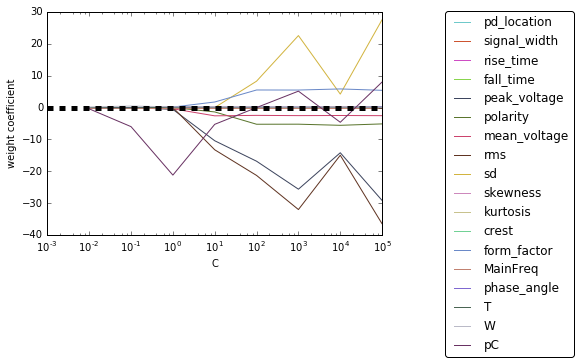

In [236]:
import matplotlib.pyplot as plt

#颜色的选择用`iWantHue`
colors = ["#6FC9CA",
"#CD5430",
"#CE4DC4",
"#88D54D",
"#3D455E",
"#5A752D",
"#CC436D",
"#603422",
"#D2B43F",
"#CD88BC",
"#C8C28D",
"#71D195",
"#6A89C8",
"#C18170",
"#7F68D1",
"#4A6553",
"#BABAC7",
"#693263"]

#计算权重
weights, params = [], []
for c in np.arange(-2, 10):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

# 开始画图
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = plt.subplot(111)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=d.columns[column],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=5)
plt.xlim([10**(-3), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left',markerscale=5)
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.savefig('l1_path.png', dpi=600)
plt.show()

#  通过sequential feature selection选择合适的参数


In [151]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

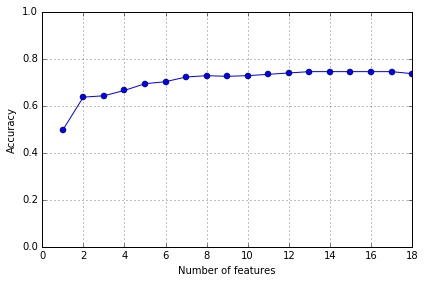

In [153]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

lr = LogisticRegression()

# selecting features
sbs = SBS(lr, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [223]:
for i in sbs.subsets_:
    print (np.array(COLUMNS[[i]]))

['pd_location' 'signal_width' 'rise_time' 'fall_time' 'peak_voltage'
 'polarity' 'mean_voltage' 'rms' 'sd' 'skewness' 'kurtosis' 'crest'
 'form_factor' 'MainFreq' 'phase_angle' 'T' 'W' 'pC']
['pd_location' 'signal_width' 'rise_time' 'fall_time' 'peak_voltage'
 'polarity' 'mean_voltage' 'rms' 'sd' 'skewness' 'kurtosis' 'crest'
 'form_factor' 'MainFreq' 'phase_angle' 'T' 'pC']
['pd_location' 'signal_width' 'rise_time' 'fall_time' 'peak_voltage'
 'polarity' 'mean_voltage' 'rms' 'sd' 'skewness' 'kurtosis' 'crest'
 'form_factor' 'MainFreq' 'T' 'pC']
['pd_location' 'signal_width' 'rise_time' 'fall_time' 'peak_voltage'
 'polarity' 'mean_voltage' 'rms' 'sd' 'skewness' 'kurtosis' 'crest'
 'form_factor' 'T' 'pC']
['pd_location' 'signal_width' 'rise_time' 'fall_time' 'peak_voltage'
 'mean_voltage' 'rms' 'sd' 'skewness' 'kurtosis' 'crest' 'form_factor' 'T'
 'pC']
['pd_location' 'signal_width' 'rise_time' 'peak_voltage' 'mean_voltage'
 'rms' 'sd' 'skewness' 'kurtosis' 'crest' 'form_factor' 'T' 'pC'

# 通过决策森林，根据特征的重要性选择合适的参数


 1) pd_location                    0.135614
 2) signal_width                   0.105168
 3) rise_time                      0.104014
 4) fall_time                      0.100831
 5) peak_voltage                   0.084795
 6) polarity                       0.071462
 7) mean_voltage                   0.056699
 8) rms                            0.056144
 9) sd                             0.048083
10) skewness                       0.044781
11) kurtosis                       0.041479
12) crest                          0.036688
13) form_factor                    0.033465
14) MainFreq                       0.029730
15) phase_angle                    0.029136
16) T                              0.011835
17) W                              0.010076
18) pC                             0.000000


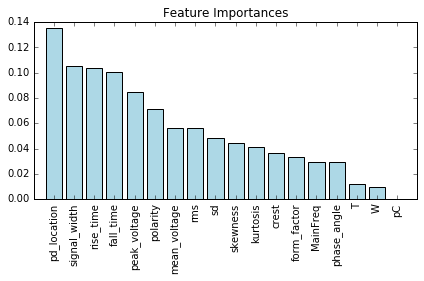

In [228]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = d.columns[0:-1]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[f], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('./figures/random_forest.png', dpi=300)
plt.show()

In [229]:
X_selected = forest.transform(X_train, threshold=0.15)
X_selected.shape

C:\Users\younggy\Anaconda\envs\python3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: Invalid threshold: all features are discarded.